In [ ]:
#overfitting
#underfitting 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from  sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

In [3]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x=data.drop('species',axis=1)
y=data.species

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=7)

In [6]:
dmodel=DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [8]:
#Test Accuracy
yprediction=dmodel.predict(xtest)
accuracy=accuracy_score(ytest,yprediction)
print(f'Accuracy:{accuracy:.2%}')
                           

Accuracy:90.00%


In [9]:
# train accuracy 
ypred_train=dmodel.predict(xtrain)
accuracy=accuracy_score(ytrain,ypred_train)
print(f'Accuracy:{accuracy:.2%}')
                           

Accuracy:100.00%


In [ ]:
here is the case of the overfitting cause all training has high accuracy(100%) whereas testing has low accuracy(90%) 
in comparision to training and testing 

In [11]:
feature=list(x.columns)
clas=list(y.unique())

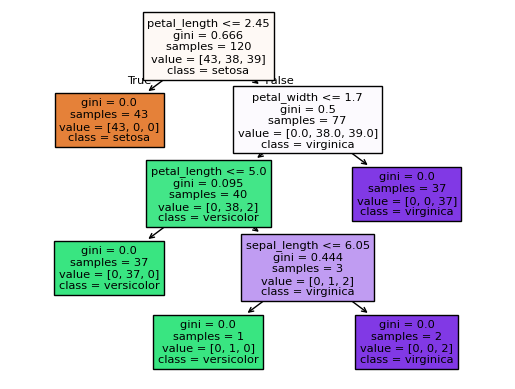

In [12]:
plot_tree(dmodel,feature_names=feature,class_names=clas,filled=True)
plt.show()

In [ ]:
depth: aafu vanda muni kati samma gako xa just consider for root 
                                                      root=  depth=4
purai tree ko depth rw label equal hunccha

In [13]:
df=pd.read_csv('Diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
x=df[['Glucose','Age']]
y=df.Outcome

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=7)

In [17]:
dmodel=DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
yprediction=dmodel.predict(xtest)
accuracy=accuracy_score(ytest,yprediction)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:65.58%


In [20]:
ypredic_train=dmodel.predict(xtrain)
accuracy=accuracy_score(ytrain,ypredic_train)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:97.56%


In [23]:
features=list(x.columns)
clas=['0','1']

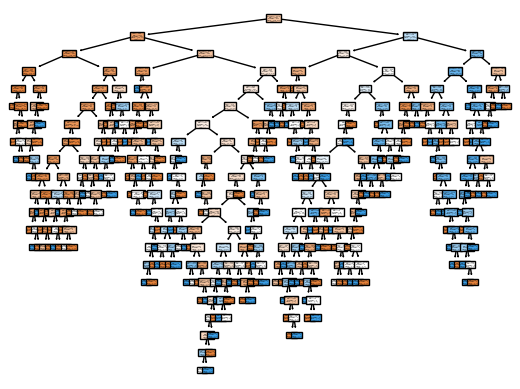

In [24]:
plot_tree(dmodel,feature_names=feature,class_names=clas,filled=True)
plt.show()

In [ ]:
yo tree yakdam thulo vayo  yo huna dino vayana  tesko lagi hami ley depth limit use garxau it helps in
avoiding the overfitting

In [26]:
dmodel2=DecisionTreeClassifier(max_depth=6)  # max_depth=6 vanyako tree ko depth only 6 hunccha
dmodel2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=6)

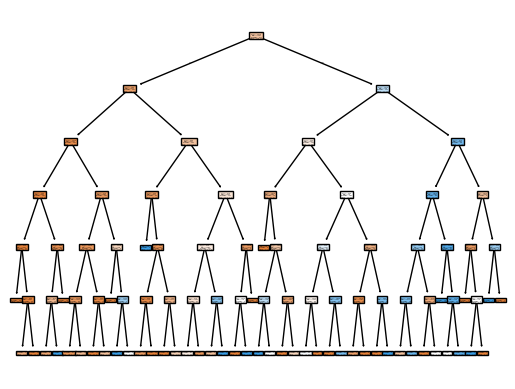

In [30]:
plot_tree(dmodel2,filled=True)
plt.show()

In [32]:
# Testing Accuracy
ypredic_test=dmodel2.predict(xtest)
accuracy=accuracy_score(ytest,ypredic_test)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:75.97%


In [33]:
ypredic_train=dmodel2.predict(xtrain)
accuracy=accuracy_score(ytrain,ypredic_train)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:79.97%


In [42]:
# make changes the max depth untill the testing data has high accuracy and training has low accuracy
dmodel2=DecisionTreeClassifier(max_depth=3)  # max_depth=6 vanyako tree ko depth only 6 hunccha
dmodel2.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

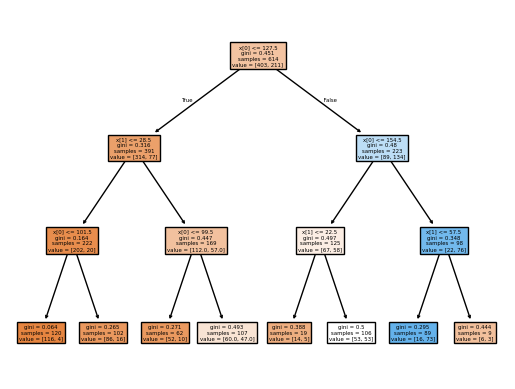

In [43]:
plot_tree(dmodel2,filled=True)
plt.show()

In [44]:
# Testing Accuracy
ypredic_test=dmodel2.predict(xtest)
accuracy=accuracy_score(ytest,ypredic_test)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:73.38%


In [45]:
ypredic_train=dmodel2.predict(xtrain)
accuracy=accuracy_score(ytrain,ypredic_train)
print(f'Accuracy:{accuracy:.2%}')

Accuracy:74.92%


In [54]:
dmodel3=DecisionTreeClassifier()

In [55]:
# Grid Search
from sklearn.model_selection import GridSearchCV


In [56]:
parameters={
    'max_depth':[4,5,6,7]
    
}

In [60]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=parameters,
    cv=5, scoring='accuracy'
)

grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7]}, scoring='accuracy')

In [ ]:
-here by doing  we can search kun depth ma best accuracy ayunxa by using the function GridSearchCV
-kun depth ma accuracy best aayo ta vanyrw herna 

In [61]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4)

In [62]:
grid_search.best_score_  # yesle sabbai max depth  ley calculate ko accuracy ko average nikilarw dinxa
                            # teo accuracy chai 72%

np.float64(0.7247500999600159)

In [68]:
dmodel=DecisionTreeClassifier()
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
dmodel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [66]:
dmodel=DecisionTreeClassifier(max_depth=5)
dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5)

In [67]:
dmodel.get_params()  # decision tree ko parameter herna lai 

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
max_depth:
max_features:
max_leaf_nodes:None  # none vayepacchi jati pani banaidinxa (yesko value set garna sakinxa 3,4 ota)
min_sample_leaf:1    # leaf ma minimum sample kati huna payine (yesko value set garna sakinxa like wise 2,3 .....n)
min_sample_split:2   # node split hudai xa vanye minimum kati ota sample vayepacchi split hune ta ?(yesko value set garna sakinxa)


In [ ]:
parameters={
    'max_depth':[4,5,6,7]
    'min_samples_leaf':[10,15]  
    

}

In [ ]:
Tomorrow:SPM